In [1]:
from google.colab import drive
drive.mount('/content/drive')

root = '/content/drive/My Drive/surely_not_sarcasm_data/'

Mounted at /content/drive


In [ ]:
!pip install contractions
!cp -r '$root/utils' .

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras
import pickle

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Embedding, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.layers import Dropout, GlobalMaxPooling1D, BatchNormalization, Concatenate
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import L1L2

from utils.preprocessing import tokenize, WordEmbeddings
from utils.evaluation import plot_history, evaluate, show_errors

sns.set_style('whitegrid');
sns.set_context('notebook', font_scale=1.2);

# prepare data

In [4]:
raw_data = pickle.load(open(root+'raw_data_2103', 'rb'))
data = pickle.load(open(root+'preprocessed_data_2103', 'rb'))

In [5]:
input_dim = 10000

In [6]:
tokenizers, tokenized_data = tokenize(data, input_dim, quantile=0.9, verbose=True)

X_train: maxlen = 22
X_train_par: maxlen = 57


In [7]:
maxlen = tokenized_data['X_train'].shape[1]
maxlen_parent = tokenized_data['X_train_par'].shape[1]

# no context
*up to date (25.03.2022)*

In [29]:
def build_seq_cnn(input_dim, vec_len, maxlen, emb_matrix, reg=5e-6):
    model = Sequential([
        Embedding(input_dim=input_dim, output_dim=vec_len, input_length=maxlen,
                mask_zero=True, weights=[emb_matrix], trainable=True,
                embeddings_regularizer=L1L2(l1=reg, l2=reg)),

        Conv1D(64, 2, activation='relu', kernel_initializer='he_normal', padding='same'),
        BatchNormalization(),
        Conv1D(64, 2, activation='relu', kernel_initializer='he_normal', padding='same'),
        BatchNormalization(),
        MaxPooling1D(2, padding='same'),
        Dropout(0.3),

        Conv1D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same'),
        BatchNormalization(),
        Conv1D(128, 3, activation='relu', kernel_initializer='he_normal', padding='same'),
        BatchNormalization(),
        MaxPooling1D(3, padding='same'),
        Dropout(0.3),

        Flatten(),
        Dense(100, activation='elu', kernel_initializer='he_normal'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    return model

## 300d normal embeddings

In [35]:
vec_len = 300
emb_matrix_comment = WordEmbeddings().get_glove_embeddings(input_dim, vec_len, tokenizers['comment'], root=root)

coverage: 0.9815


In [36]:
model = build_seq_cnn(input_dim, vec_len, maxlen, emb_matrix_comment, reg=5e-6)

es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=3, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(tokenized_data['X_train'], data['y_train'], batch_size=128, epochs=50, callbacks=[es],
                validation_data=(tokenized_data['X_val'], data['y_val']))

Epoch 1/50
6002/6002 [==============================] - 122s 20ms/step - loss: 1.8193 - accuracy: 0.6946 - val_loss: 0.6977 - val_accuracy: 0.7196
Epoch 2/50
6002/6002 [==============================] - 118s 20ms/step - loss: 0.6564 - accuracy: 0.7203 - val_loss: 0.6208 - val_accuracy: 0.7293
Epoch 3/50
6002/6002 [==============================] - 119s 20ms/step - loss: 0.6226 - accuracy: 0.7281 - val_loss: 0.6141 - val_accuracy: 0.7284
Epoch 4/50
6002/6002 [==============================] - 120s 20ms/step - loss: 0.6122 - accuracy: 0.7329 - val_loss: 0.6053 - val_accuracy: 0.7319
Epoch 5/50
6002/6002 [==============================] - 122s 20ms/step - loss: 0.6051 - accuracy: 0.7357 - val_loss: 0.6006 - val_accuracy: 0.7357
Epoch 6/50
6002/6002 [==============================] - 122s 20ms/step - loss: 0.6003 - accuracy: 0.7385 - val_loss: 0.5966 - val_accuracy: 0.7377
Epoch 7/50
6002/6002 [==============================] - 119s 20ms/step - loss: 0.5959 - accuracy: 0.7400 - val_loss: 0

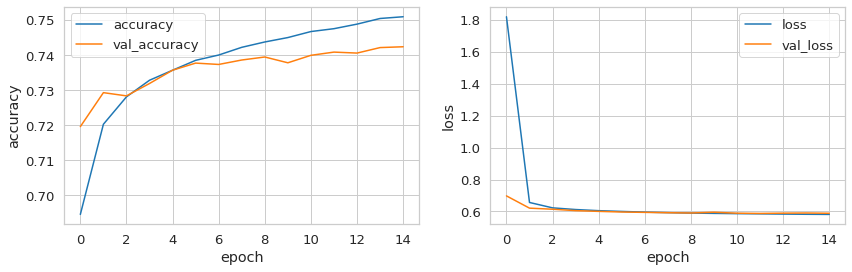

In [37]:
plot_history(fit)

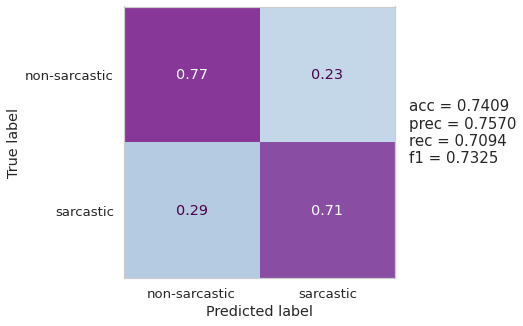

In [38]:
evaluate(model, tokenized_data['X_val'], data['y_val'])

In [39]:
model.save(root+'models/cnn_300d')

INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/models/cnn_300d/assets


## 100d normal embeddings
02.04.2022

In [28]:
vec_len = 100
emb_matrix_comment = WordEmbeddings().get_glove_embeddings(input_dim, vec_len, tokenizers['comment'], root=root)

coverage: 0.9815


In [30]:
model = build_seq_cnn(input_dim, vec_len, maxlen, emb_matrix_comment, reg=5e-6)

es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=3, restore_best_weights=True)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(tokenized_data['X_train'], data['y_train'], batch_size=128, epochs=50, callbacks=[es],
                validation_data=(tokenized_data['X_val'], data['y_val']))

Epoch 1/50
6002/6002 [==============================] - 105s 17ms/step - loss: 1.6103 - accuracy: 0.6904 - val_loss: 0.7626 - val_accuracy: 0.7198
Epoch 2/50
6002/6002 [==============================] - 108s 18ms/step - loss: 0.6851 - accuracy: 0.7213 - val_loss: 0.6419 - val_accuracy: 0.7221
Epoch 3/50
6002/6002 [==============================] - 107s 18ms/step - loss: 0.6213 - accuracy: 0.7282 - val_loss: 0.6034 - val_accuracy: 0.7325
Epoch 4/50
6002/6002 [==============================] - 103s 17ms/step - loss: 0.6010 - accuracy: 0.7332 - val_loss: 0.5926 - val_accuracy: 0.7340
Epoch 5/50
6002/6002 [==============================] - 102s 17ms/step - loss: 0.5911 - accuracy: 0.7360 - val_loss: 0.5886 - val_accuracy: 0.7334
Epoch 6/50
6002/6002 [==============================] - 105s 18ms/step - loss: 0.5861 - accuracy: 0.7396 - val_loss: 0.5823 - val_accuracy: 0.7376
Epoch 7/50
6002/6002 [==============================] - 106s 18ms/step - loss: 0.5825 - accuracy: 0.7414 - val_loss: 0

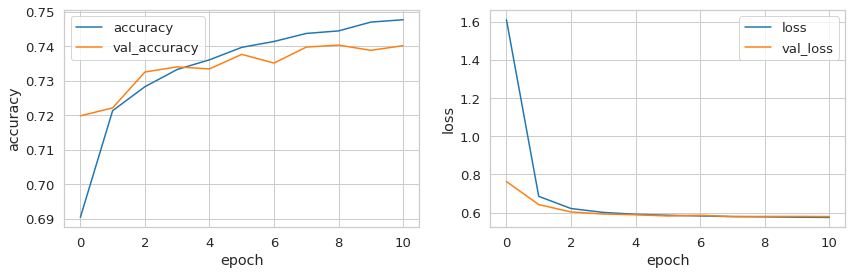

In [32]:
plot_history(fit)

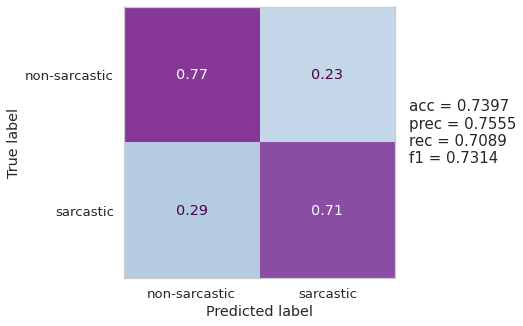

In [33]:
evaluate(model, tokenized_data['X_val'], data['y_val'])

In [34]:
model.save(root+'models/cnn')

INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/models/cnn/assets


## three kernel widths

In [10]:
vec_len = 100
emb_matrix_comment = WordEmbeddings().get_glove_embeddings(input_dim, vec_len, tokenizers['comment'], root=root)

coverage: 0.9815


In [24]:
def build_cnn_block(emb_layer, k):
    x = Conv1D(128, k, activation='relu', kernel_initializer='he_normal', padding='same')(emb_layer)
    x = BatchNormalization()(x)
    x = Conv1D(128, k, activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = GlobalMaxPooling1D()(x)

    return x

In [25]:
input_layer =  keras.Input(shape=(None,))
emb_layer = Embedding(input_dim=input_dim, output_dim=vec_len, input_length=maxlen,
                      mask_zero=True, weights=[emb_matrix_comment], trainable=True,
                      embeddings_regularizer=L1L2(l1=5e-6, l2=5e-6))(input_layer)

cnn_k2 = build_cnn_block(emb_layer, k=2)
cnn_k3 = build_cnn_block(emb_layer, k=3)
cnn_k5 = build_cnn_block(emb_layer, k=5)

x = Concatenate()([cnn_k2, cnn_k3, cnn_k5])
x = Dense(200, activation='elu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

es = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=3, restore_best_weights=True)

model = keras.Model(inputs=[input_layer], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(tokenized_data['X_train'], data['y_train'], batch_size=128, epochs=50, callbacks=[es],
                validation_data=(tokenized_data['X_val'], data['y_val']))

Epoch 1/50
6002/6002 [==============================] - 140s 23ms/step - loss: 1.4831 - accuracy: 0.7061 - val_loss: 0.7267 - val_accuracy: 0.7246
Epoch 2/50
6002/6002 [==============================] - 137s 23ms/step - loss: 0.6574 - accuracy: 0.7291 - val_loss: 0.6159 - val_accuracy: 0.7324
Epoch 3/50
6002/6002 [==============================] - 137s 23ms/step - loss: 0.6036 - accuracy: 0.7368 - val_loss: 0.6011 - val_accuracy: 0.7310
Epoch 4/50
6002/6002 [==============================] - 141s 23ms/step - loss: 0.5870 - accuracy: 0.7430 - val_loss: 0.5861 - val_accuracy: 0.7403
Epoch 5/50
6002/6002 [==============================] - 138s 23ms/step - loss: 0.5787 - accuracy: 0.7491 - val_loss: 0.5977 - val_accuracy: 0.7380
Epoch 6/50
6002/6002 [==============================] - 137s 23ms/step - loss: 0.5736 - accuracy: 0.7559 - val_loss: 0.5891 - val_accuracy: 0.7431
Epoch 7/50
6002/6002 [==============================] - 138s 23ms/step - loss: 0.5698 - accuracy: 0.7621 - val_loss: 0

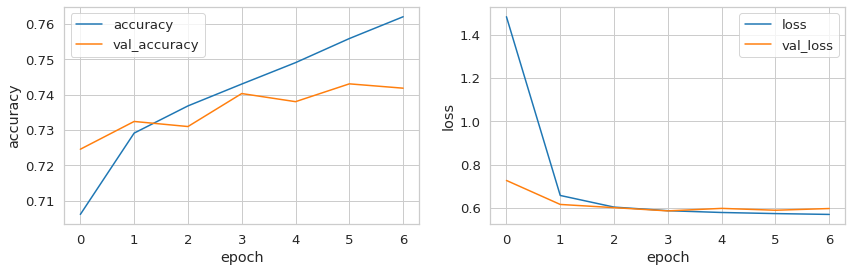

In [26]:
plot_history(fit)

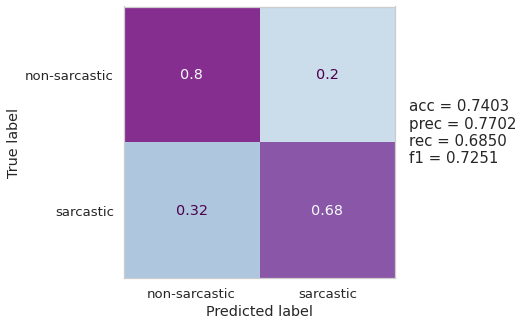

In [27]:
evaluate(model, tokenized_data['X_val'], data['y_val'])

# context
*up to date (25.03.2022)*

In [ ]:
vec_len = 100

wordemb = WordEmbeddings()
emb_matrix_comment = wordemb.get_glove_embeddings(input_dim, vec_len, tokenizers['comment'], root=root)
emb_matrix_parent = wordemb.get_glove_embeddings(input_dim, vec_len, tokenizers['parent'], root=root)

coverage: 0.9815
coverage: 0.9893


In [ ]:
train_data = {'comment': tokenized_data['X_train'], 'parent': tokenized_data['X_train_par']}
val_data = {'comment': tokenized_data['X_val'], 'parent': tokenized_data['X_val_par']}

In [ ]:
def build_cnn(input_layer, vec_len, maxlen, embedding_matrix, reg=1e-6):
    x = Embedding(input_dim=input_dim, output_dim=vec_len, input_length=maxlen,
                  mask_zero=True, weights=[embedding_matrix], trainable=True,
                  embeddings_regularizer=L1L2(l1=reg, l2=reg))(input_layer)

    x = Conv1D(32, 2, activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv1D(32, 2, activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling1D(2, padding='same')(x)
    x = Dropout(0.3)(x)

    x = Conv1D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)
    x = Conv1D(64, 3, activation='relu', kernel_initializer='he_normal', padding='same')(x)
    x = BatchNormalization()(x)

    x = GlobalMaxPooling1D()(x)

    return x

In [ ]:
comment_input =  keras.Input(shape=(None,), name='comment')
parent_input = keras.Input(shape=(None,), name='parent')

comment_cnn = build_cnn(comment_input, vec_len, maxlen, emb_matrix_comment, reg=5e-6)
parent_cnn = build_cnn(parent_input, vec_len, maxlen_parent, emb_matrix_parent, reg=5e-6)

x = Concatenate()([comment_cnn, parent_cnn])
x = Dense(100, activation='elu', kernel_initializer='he_normal')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)

es = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=3, restore_best_weights=True)

model = keras.Model(inputs=[comment_input, parent_input], outputs=[output])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
fit = model.fit(train_data, data['y_train'], epochs=50, batch_size=128, callbacks=[es],
                validation_data=(val_data, data['y_val']))

Epoch 1/50
6002/6002 [==============================] - 158s 26ms/step - loss: 2.4055 - accuracy: 0.6889 - val_loss: 0.7916 - val_accuracy: 0.7148
Epoch 2/50
6002/6002 [==============================] - 146s 24ms/step - loss: 0.6967 - accuracy: 0.7209 - val_loss: 0.6403 - val_accuracy: 0.7269
Epoch 3/50
6002/6002 [==============================] - 145s 24ms/step - loss: 0.6301 - accuracy: 0.7277 - val_loss: 0.6093 - val_accuracy: 0.7329
Epoch 4/50
6002/6002 [==============================] - 144s 24ms/step - loss: 0.6089 - accuracy: 0.7331 - val_loss: 0.5964 - val_accuracy: 0.7349
Epoch 5/50
6002/6002 [==============================] - 145s 24ms/step - loss: 0.5985 - accuracy: 0.7366 - val_loss: 0.5911 - val_accuracy: 0.7372
Epoch 6/50
6002/6002 [==============================] - 144s 24ms/step - loss: 0.5925 - accuracy: 0.7393 - val_loss: 0.5873 - val_accuracy: 0.7374
Epoch 7/50
6002/6002 [==============================] - 146s 24ms/step - loss: 0.5881 - accuracy: 0.7413 - val_loss: 0

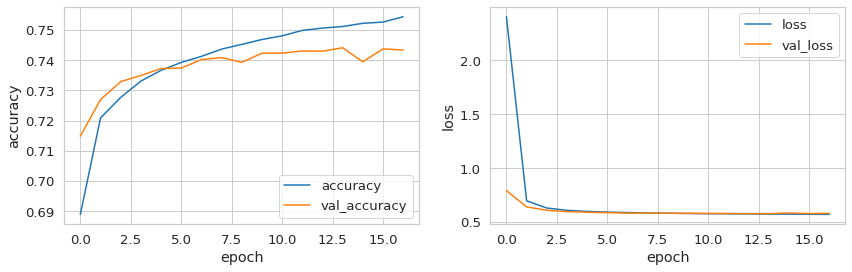

In [ ]:
plot_history(fit)

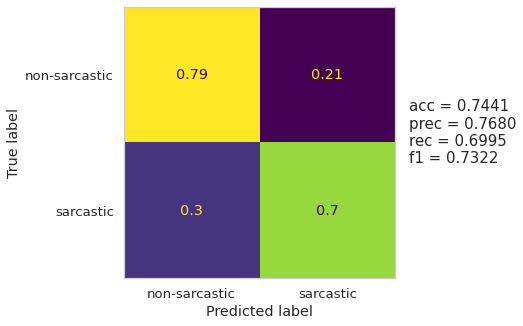

In [ ]:
evaluate(model, (tokenized_data['X_val'], tokenized_data['X_val_par']), data['y_val'])

In [ ]:
show_errors(model, raw_data['X_val'].values, (tokenized_data['X_val'], tokenized_data['X_val_par']),
            data['y_val'], X_parents=raw_data['X_val_par'].values)

False negatives:
---------------------------
parent: Sounds fun actually, I wish there was a form of messaging with agario
comment: There is, just press ctrl+W

parent: Oh, there's no trash barrel around for my empty energy drink, guess they're not supporting my lifestyle, guess I'm throwing it on the ground now, not my fault.
comment: a lit cigarette and an empty big gulp are pretty much the same thing, so I follow your logic.

parent: What's a question there is no answer to?
comment: Where's Waldo?

parent: Men don't think they're "being used" when they're getting free pussy with no committment dude. Assuming girl is attractive, it's weird to turn it down because the other guy is enjoying watching. A bitch's a bitch and he's still a bitch. Who cares?
comment: If any guy is getting sexual satisfaction within 100 yards of me it automatically makes me uncomfortable about my sexuality.

parent: My Friend Made Some Ted Cruz Shirts
comment: He's a regular Picasso.


False positives:
------

In [ ]:
model.save(root+'models/context_cnn_globalmaxpool')

INFO:tensorflow:Assets written to: /content/drive/My Drive/surely_not_sarcasm_data/context_cnn_globalmaxpool/assets
